In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv(r"/content/COVIDSenti-A.csv")
data

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [5]:
data.shape

(30000, 2)

In [6]:
data.columns

Index(['tweet', 'label'], dtype='object')

In [7]:
data.isnull().sum()

tweet    0
label    0
dtype: int64

In [8]:
data.duplicated().sum()

13

In [9]:
data.shape

(30000, 2)

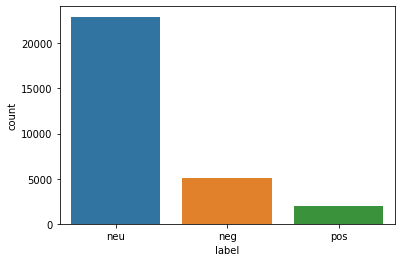

In [10]:
sns.countplot(x="label", data=data)
plt.show()

In [12]:
!pip install unidecode
#preprocesssing
import re
from nltk.corpus import stopwords
from unidecode import unidecode
from nltk.tokenize import word_tokenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 3.9 MB/s 


In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
stop_words = set(stopwords.words('english'))
stop_words.add('https')
for i in data.index:
  data['tweet'][i]=re.sub('[@#&?-?><=!`\-:,()|]',' ',data['tweet'][i])
  word_tokens = word_tokenize(data['tweet'][i])
  filtered_sentence = [w.lower() for w in word_tokens if not w.lower() in stop_words and not (w.startswith('https://') or w.startswith('//') )]
  filtered_sentence=[unidecode(w) for w in filtered_sentence]
  data['tweet'][i]=(' '.join(filtered_sentence))

In [15]:
#splitting data frame into x and y
x=data["tweet"]
y=data["label"]

In [16]:
#splitting data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=63)

In [17]:
x_train

25114    dear gullible asian parents facebook stop read...
10541         declares coronavirus global health emergency
3478      coronavirus stuff inner hypochondriac going nuts
28320    letters keep cool coronavirus epidemic calligr...
5491               fifth us case coronavirus confirmed ...
                               ...                        
2386     man diagnosed wuhan coronavirus near seattle t...
25815                countries confirmed cases coronavirus
139               corona virus ton soup banned u.s. .. uou
11380    u keep spreading nasty shits . para kang coron...
5164     dohgov need discuss avoid infection diseases c...
Name: tweet, Length: 21000, dtype: object

In [18]:
x_test

15699       speakerpelosi government importing coronavirus
442           coronavirus cure treat coronavirus dangerous
4464     china steal coronavirus canada weaponize zero ...
19646                      wuhan coronavirus key!+symptoms
27417    coronavirus south korean pm vows 'swift ' acti...
                               ...                        
26580    $ ccx strong 1h result decent outlook cut div ...
14348    coronavirus updates latest news outbreak globa...
5159                                  indeed . coronavirus
2049                               's deal coronavirus get
13084    chinese markets plummet coronavirusoutbreak . ...
Name: tweet, Length: 9000, dtype: object

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

In [20]:
#linear kernel
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(train_vectors,y_train)

SVC(kernel='linear')

In [21]:
pred_linear=clf.predict(test_vectors)
from sklearn import metrics
metrics.accuracy_score(y_test,pred_linear)

0.8867777777777778

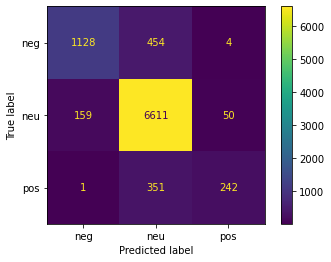

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
ConfusionMatrixDisplay.from_predictions(y_test, pred_linear)

In [23]:
print(classification_report(y_test, pred_linear))

              precision    recall  f1-score   support

         neg       0.88      0.71      0.78      1586
         neu       0.89      0.97      0.93      6820
         pos       0.82      0.41      0.54       594

    accuracy                           0.89      9000
   macro avg       0.86      0.70      0.75      9000
weighted avg       0.88      0.89      0.88      9000

